## Part 2: Data Pre-Processing

In [1]:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import warnings
warnings.filterwarnings("ignore")
import tools

from datetime import datetime
import pytz

In [2]:
# Open the nc. file
dset = xr.open_dataset('/Users/mendezjf/Downloads/Geo_modeling/Course_Data/ERA5_Data/download.nc')

In [3]:
# Extract the relevant variables from the dataset
t2m = np.array(dset.variables['t2m'])
tp = np.array(dset.variables['tp'])
latitude = np.array(dset.variables['latitude'])
longitude = np.array(dset.variables['longitude'])
time_dt = np.array(dset.variables['time'])

In [4]:
# To get information about the file
#dset

In [5]:
# To get information about the variables
#dset.variables.keys()

In [6]:
# To get information about the variables
#dset.data_vars

In [7]:
#Convert the air temperature (’t2m’) from K to ◦C 
t2m = t2m - 273.15
#Convert the precipitation (tp) from m/h to mm/h
tp = tp * 1000

In [8]:
# If the ERA5 dataset has four dimensions, indicating the presence of both final and preliminary
# data, compute the mean across the second dimension to simplify the dataset
if t2m.ndim == 4:
    t2m = np.nanmean(t2m, axis=1)
    tp = np.nanmean(tp, axis=1)

In [9]:
# Create a Pandas dataframe containing time series data for both air temperature and precipitation.
# Focus on the grid cell closest to the reservoir (row 3, column 2):

# Create a DataFrame in which the time is the index
df_era5 = pd.DataFrame(index=time_dt)
# Create the columns temperature and precipitation
df_era5['t2m'] = t2m[:,3,2]
df_era5['tp'] = tp[:,3,2]
# plot the dataframe
df_era5

,t2m,tp
2018-01-01 00:00:00,25.183167,0.015377
2018-01-01 01:00:00,25.193542,0.001042
2018-01-01 02:00:00,24.517334,0.000000
2018-01-01 03:00:00,24.180511,0.000000
2018-01-01 04:00:00,24.256287,0.005733
...,...,...
2023-12-23 06:00:00,25.027069,0.524126
2023-12-23 07:00:00,24.848938,0.177489
2023-12-23 08:00:00,26.184540,0.144128
2023-12-23 09:00:00,26.092560,0.060205


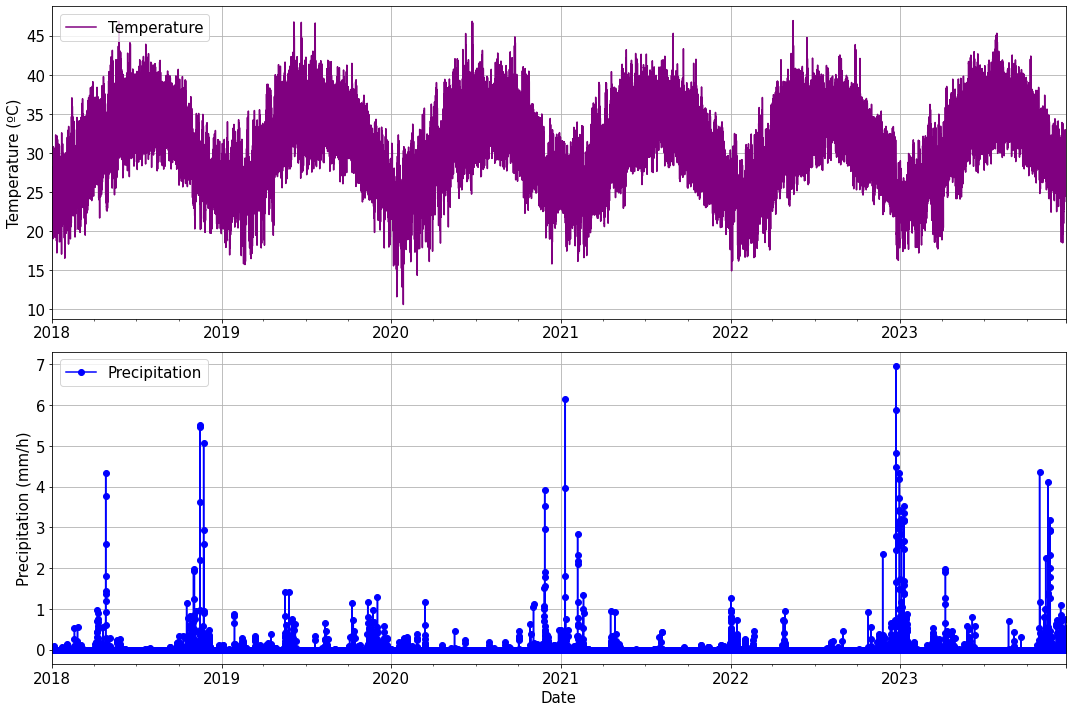

In [24]:
# Plotting the temperature
fig, ax = plt.subplots(2, 1, figsize=(15, 10))  # Adjust the size as needed
df_era5.loc[:, ['t2m']].plot(ax=ax[0], kind='line', title='', ylabel='Temperature (ºC)', xlabel='', marker='', grid=True, color='purple')
ax[0].tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax[0].xaxis.label.set_size(15)  # X-axis label size
ax[0].yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax[0].legend(['Temperature'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Plotting the Precipitation
df_era5.loc[:, ['tp']].plot(ax=ax[1], kind='line', title='', ylabel='Precipitation (mm/h)', xlabel='Date', marker='o', grid=True, color='blue')
ax[1].tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax[1].xaxis.label.set_size(15)  # X-axis label size
ax[1].yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax[1].legend(['Precipitation'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Adjust layout to prevent overlapping
plt.tight_layout()

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_6/part_2_q_7', dpi = 300)

# Show the plot
plt.show()

In [11]:
# What is the average annual precipitation in mm y−1? Resample the data to annual time
# step and calculate the mean precipitation as follows

# Based on the index (date), it takes per year the mean
annual_precip = df_era5['tp'].resample('A').mean()*24*365.25
# Average annual precipitation
mean_annual_precip = np.nanmean(annual_precip)
# Showing the value
mean_annual_precip

88.34638

##### Do you notice any trends in the time series for air temperature and/or precipitation?

In terms of precipitation, the annual precipitation decrease from 2018 to 2021, and increase from 2021 to 2023.
For temperature, we do not find a clear trend, however, it is important to mention that from 2019 on, the temperature increases and decreases sequentially.

In [12]:
# Get the table of precipitation per year
annual_precip = pd.DataFrame(annual_precip)
annual_precip

,tp
2018-12-31,101.037621
2019-12-31,58.512581
2020-12-31,52.761230
2021-12-31,46.976620
2022-12-31,117.585114
2023-12-31,153.205124


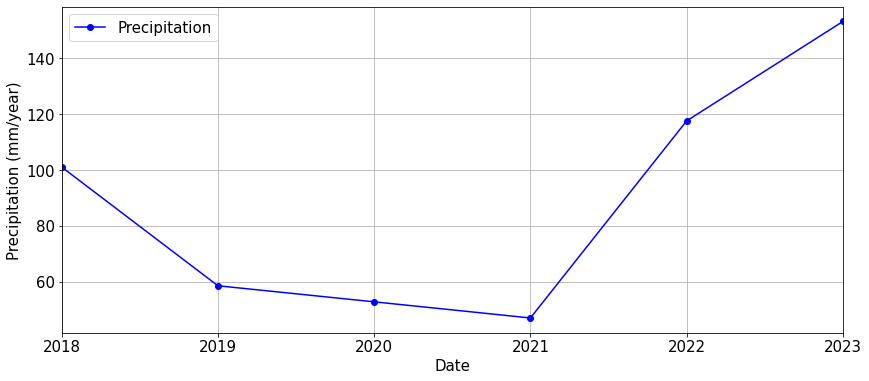

In [25]:
# Plotting precipitation per year
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust the size as needed
annual_precip.plot(ax=ax, kind='line', title='', ylabel='Precipitation (mm/year)', xlabel='Date', marker='o', grid=True, color='blue')
ax.tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax.xaxis.label.set_size(15)  # X-axis label size
ax.yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax.legend(['Precipitation'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_6/part_2_q_9_precipitation', dpi = 300)

# Show the plot
plt.show()

In [14]:
# Get the table of temperature per year
annual_temperature = df_era5['t2m'].resample('A').mean()
annual_temperature = pd.DataFrame(annual_temperature)
annual_temperature

,t2m
2018-12-31,30.680191
2019-12-31,30.576729
2020-12-31,30.012575
2021-12-31,30.450525
2022-12-31,30.236490
2023-12-31,30.861465


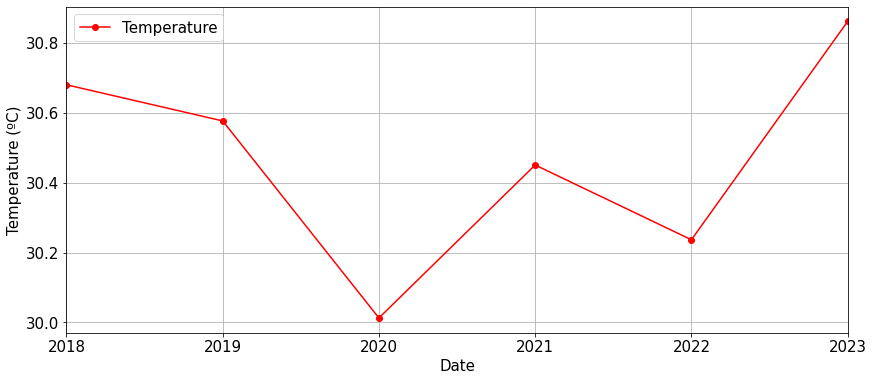

In [26]:
# Plotting temperature
fig, ax = plt.subplots(figsize=(14, 6))  # Adjust the size as needed
annual_temperature.plot(ax=ax, kind='line', title='', ylabel='Temperature (ºC)', xlabel='Date', marker='o', grid=True, color='red')
ax.tick_params(axis='both', which='both', labelsize= 15)  # Tick label size
ax.xaxis.label.set_size(15)  # X-axis label size
ax.yaxis.label.set_size(15)  # Y-axis label size
# Add a legend with modified size
ax.legend(['Temperature'], loc='upper left', fontsize=15)  # Adjust the fontsize parameter

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_6/part_2_q_9_temperature', dpi = 300)

# Show the plot
plt.show()

#### How reliable do think the data on precipitation and air temperature are? Discuss whether one might be more reliable than the other.

It depends on various factors, including:

-The methods employed for measurements and simulation
-Spatial variations
-The effectiveness of data quality control procedures

Both parameters can exhibit reliability when standardized techniques are used,  which take into account the maintenance of instruments and equipment, and stringent quality control protocols. Nevertheless, the degree of reliability is contingent on specific conditions and the effectiveness of the data collection process and the simulation.

## Part 3: Calculation of Potential Evaporation (PE)

In [16]:
# Derive all inputs for the function from the hourly ERA5 data:
tmin = df_era5['t2m'].resample('D').min().values
tmax = df_era5['t2m'].resample('D').max().values
tmean = df_era5['t2m'].resample('D').mean().values
lat = 21.25
doy = df_era5['t2m'].resample('D').mean().index.dayofyear

In [17]:
# Compute the PE using
pe = tools.hargreaves_samani_1982(tmin, tmax, tmean, lat, doy)

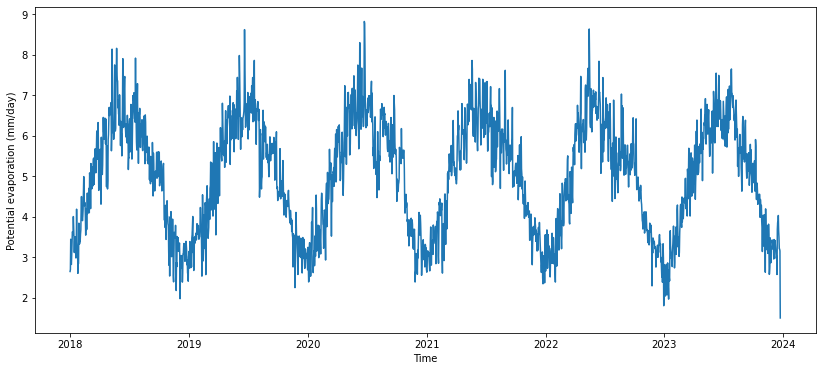

In [27]:
# Plot the PE time series

# Establish the index (days)
ts_index = df_era5['t2m'].resample('D').mean().index
# Plot the figure of Potential Evaporation
plt.figure(figsize=(14, 6))
plt.plot(ts_index, pe, label='Potential Evaporation')
plt.xlabel('Time')
plt.ylabel('Potential evaporation (mm/day)')

# Save the figure
plt.savefig('/Users/mendezjf/Downloads/Geo_modeling/Result_data/Assignment_6/part_3_q_3', dpi = 300)

plt.show()

In [19]:
# What is the mean annual PE in mm y−1?

In [20]:
test = pd.DataFrame(index=ts_index)
test['PE'] = pe

annual_pe = test['PE'].resample('A').mean()*365
mean_annual_pe = np.nanmean(annual_pe)
mean_annual_pe

1825.6348

In [23]:
# Based on the mean annual PE, 
# What is the volume of water potentially lost from the reservoir through evaporation annually?
print(f'The volume of water potentially lost is { mean_annual_pe * 1.6e6  } liters/year   ')
print(f'The volume of water potentially lost is { mean_annual_pe * 1.6e6 *0.001 } cubic meters/year   ')

The volume of water potentially lost is 2921015625.0 liters/year   
The volume of water potentially lost is 2921015.625 cubic meters/year   


#### Do you think evaporation from open water is generally higher or lower than evaporation from a grass surface?

Open water generally has higher evaporation rates. This is mainly due to the fact that bodies of water possess a greater exposed surface area to the air, enabling a greater number of water molecules to evaporate into the atmosphere. Furthermore, water bodies typically encounter fewer obstructions that might impede the airflow, thereby enhancing the evaporation process.

However, specific circumstances may lead to variations in the relative evaporation rates of open water and grass surfaces such as local conditions, vegetation type, and meteorological conditions.

#### Do you consider 1.6 km^2 to be a good estimate for the average area of the reservoir? Use the EO Browser to answer this question.

A value of roughly 1.4 km^2 was obtained using the EO Browser. So, a value of 1.6 km^2 can be a good value, considering that it can change regarding the season and local meteorological conditions.